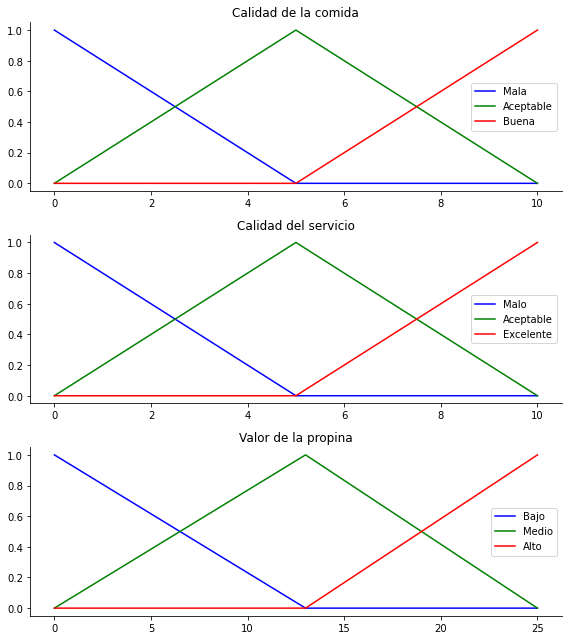

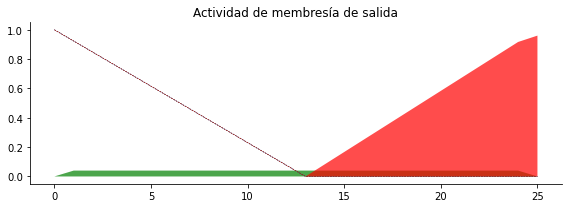

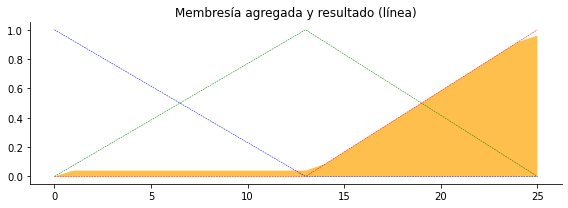

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x_calidad = np.arange(0, 11, 1)
x_servicio = np.arange(0, 11, 1)
x_propina = np.arange(0, 26, 1)

calidad_baja = fuzz.trimf(x_calidad, [0, 0, 5])
calidad_media = fuzz.trimf(x_calidad, [0, 5, 10])
calidad_alta = fuzz.trimf(x_calidad, [5, 10, 10])
servicio_bajo = fuzz.trimf(x_servicio, [0, 0, 5])
servicio_medio = fuzz.trimf(x_servicio, [0, 5, 10])
servicio_alto = fuzz.trimf(x_servicio, [5, 10, 10])
propina_baja = fuzz.trimf(x_propina, [0, 0, 13])
propina_media = fuzz.trimf(x_propina, [0, 13, 25])
propina_alta = fuzz.trimf(x_propina, [13, 25, 25])


fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8,9))
ax0.plot(x_calidad, calidad_baja, 'b', linewidth=1.5, label='Mala')
ax0.plot(x_calidad, calidad_media, 'g', linewidth=1.5, label='Aceptable')
ax0.plot(x_calidad, calidad_alta, 'r', linewidth=1.5, label='Buena')
ax0.set_title('Calidad de la comida')
ax0.legend()
ax1.plot(x_servicio, servicio_bajo, 'b', linewidth=1.5, label='Malo')
ax1.plot(x_servicio, servicio_medio, 'g', linewidth=1.5, label='Aceptable')
ax1.plot(x_servicio, servicio_alto, 'r', linewidth=1.5, label='Excelente')
ax1.set_title('Calidad del servicio')
ax1.legend()
ax2.plot(x_propina, propina_baja, 'b', linewidth=1.5, label='Bajo')
ax2.plot(x_propina, propina_media, 'g', linewidth=1.5, label='Medio')
ax2.plot(x_propina, propina_alta, 'r', linewidth=1.5, label='Alto')
ax2.set_title('Valor de la propina')
ax2.legend()


for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

nivel_calidad_bajo = fuzz.interp_membership(x_calidad, calidad_baja, 6.5)
nivel_calidad_medio = fuzz.interp_membership(x_calidad, calidad_media, 6.5)
nivel_calidad_alto = fuzz.interp_membership(x_calidad, calidad_alta, 6.5)
nivel_servicio_bajo = fuzz.interp_membership(x_servicio, servicio_bajo, 9.8)
nivel_servicio_medio = fuzz.interp_membership(x_servicio, servicio_medio, 9.8)
nivel_servicio_alto = fuzz.interp_membership(x_servicio, servicio_alto, 9.8)

activar_regla1 = np.fmax(nivel_calidad_bajo, nivel_servicio_bajo)
activacion_propina_baja = np.fmin(activar_regla1, propina_baja)
activacion_propina_media = np.fmin(nivel_servicio_medio, propina_media)
activar_regla3 = np.fmax(nivel_calidad_alto, nivel_servicio_alto)
activacion_propina_alta = np.fmin(activar_regla3, propina_alta)
propina0 = np.zeros_like(x_propina)

fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.fill_between(x_propina, propina0, activacion_propina_baja, facecolor='b', alpha=0.7)
ax0.plot(x_propina, propina_baja, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(x_propina, propina0, activacion_propina_media, facecolor='g', alpha=0.7)
ax0.plot(x_propina, propina_baja, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_propina, propina0, activacion_propina_alta, facecolor='r', alpha=0.7)
ax0.plot(x_propina, propina_baja, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Actividad de membresía de salida')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

agregado = np.fmax(activacion_propina_baja,np.fmax(activacion_propina_media, activacion_propina_alta))

propina = fuzz.defuzz(x_propina, agregado, 'centroid')
activacion_propina = fuzz.interp_membership(x_propina, agregado, propina)

fig, ax0 = plt.subplots(figsize=(8,3))
ax0.plot(x_propina, propina_baja, 'b', linewidth=0.5, linestyle='--')
ax0.plot(x_propina, propina_media, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_propina, propina_alta, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_propina, propina0, agregado, facecolor='Orange', alpha=0.7)
ax0.set_title('Membresía agregada y resultado (línea)')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()